# Business Case

● Cardiovascular diseases (**CVDs**) are the number **1 cause of death globally**, taking an estimated **17.9 million lives each year**, which accounts for **31% of all deaths worldwide**. Four out of five CVD deaths are due to **heart attacks** and **strokes**, and **one-third** of these deaths occur **prematurely in people under 70 years of age**. **Heart failure** is a common event caused by CVDs, and this dataset contains **11 features** that can be used to predict a possible heart disease.  

● People with **cardiovascular disease** or those at **high cardiovascular risk** (due to the presence of one or more risk factors such as **hypertension, diabetes, hyperlipidaemia,** or **already established disease**) require **early detection** and **timely management**, wherein a **machine learning model** can be of great help.  


# Domian Analysis

1. **patient_id** – Unique and random identifier.  
2. **slope_of_peak_exercise_st_segment** – The slope of the peak exercise ST segment, an electrocardiography readout indicating quality of blood flow to the heart.  
3. **thal** – Results of thallium stress test measuring blood flow to the heart (possible values: *normal, fixed_defect, reversible_defect*).  
4. **resting_blood_pressure** – Resting blood pressure of the patient.  
5. **chest_pain_type** – Type of chest pain experienced (4 values).  
6. **num_major_vessels** – Number of major vessels (0–3) colored by fluoroscopy.  
7. **fasting_blood_sugar_gt_120_mg_per_dl** – Fasting blood sugar level greater than 120 mg/dl.  
8. **resting_ekg_results** – Resting electrocardiographic results (values: 0, 1, 2).  
9. **serum_cholesterol_mg_per_dl** – Serum cholesterol level in mg/dl.  
10. **oldpeak_eq_st_depression** – ST depression induced by exercise relative to rest, indicating abnormality in electrocardiograms.  
11. **sex** – Gender of the patient (0: Female, 1: Male).  
12. **age** – Age of the patient in years.  
13. **max_heart_rate_achieved** – Maximum heart rate achieved (beats per minute).  
14. **exercise_induced_angina** – Exercise-induced chest pain (0: False, 1: True).  

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

## Importing Data 

In [6]:
data1 = pd.read_csv('values.csv')

In [7]:
data2 = pd.read_csv('labels.csv')

In [8]:
hd= pd.concat([data1,data2.drop('patient_id',axis=1)],axis=1)

In [9]:
hd

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


## Basic Checks

In [11]:
hd.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [12]:
hd.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [13]:
hd.shape

(180, 15)

In [14]:
hd.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [15]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [16]:
hd.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


## Exploratory Data Analysis

### Univariate Analysis

In [19]:
for i in hd:
    if len(hd[i].unique())<=20:
        print(hd[i].value_counts())
        print('**********************************************************')

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
**********************************************************
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
**********************************************************
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
**********************************************************
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
**********************************************************
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
**********************************************************
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64
**********************************************************
sex
1    124
0     56
Name: count, dtype: int64
**********************************************************
exercise_induced_angina
0    123
1     57
Name:

In [20]:
hd_cate =[]
for i in hd:
    if len(hd[i].unique())<=20:
        hd_cate.append(i)
hd_cate

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'heart_disease_present']

In [21]:
d1 = hd[hd_cate]
d1

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,heart_disease_present
0,1,normal,2,0,0,2,1,0,0
1,2,normal,3,0,0,0,0,0,0
2,1,normal,4,3,0,2,1,1,1
3,1,reversible_defect,4,0,0,0,1,0,1
4,3,reversible_defect,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4,2,1,0,1,0,1
176,2,normal,4,0,0,1,0,1,1
177,2,reversible_defect,3,0,0,0,1,1,1
178,1,normal,3,2,1,0,1,0,0


In [22]:
d2 = hd.drop(hd_cate,axis=1)
d2

,patient_id,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,0z64un,128,308,0.0,45,170
1,ryoo3j,110,214,1.6,54,158
2,yt1s1x,125,304,0.0,77,162
3,l2xjde,152,223,0.0,40,181
4,oyt4ek,178,270,4.2,59,145
...,...,...,...,...,...,...
175,5qfar3,125,254,0.2,67,163
176,2s2b1f,180,327,3.4,55,117
177,nsd00i,125,309,1.8,64,131
178,0xw93k,124,255,0.0,48,175


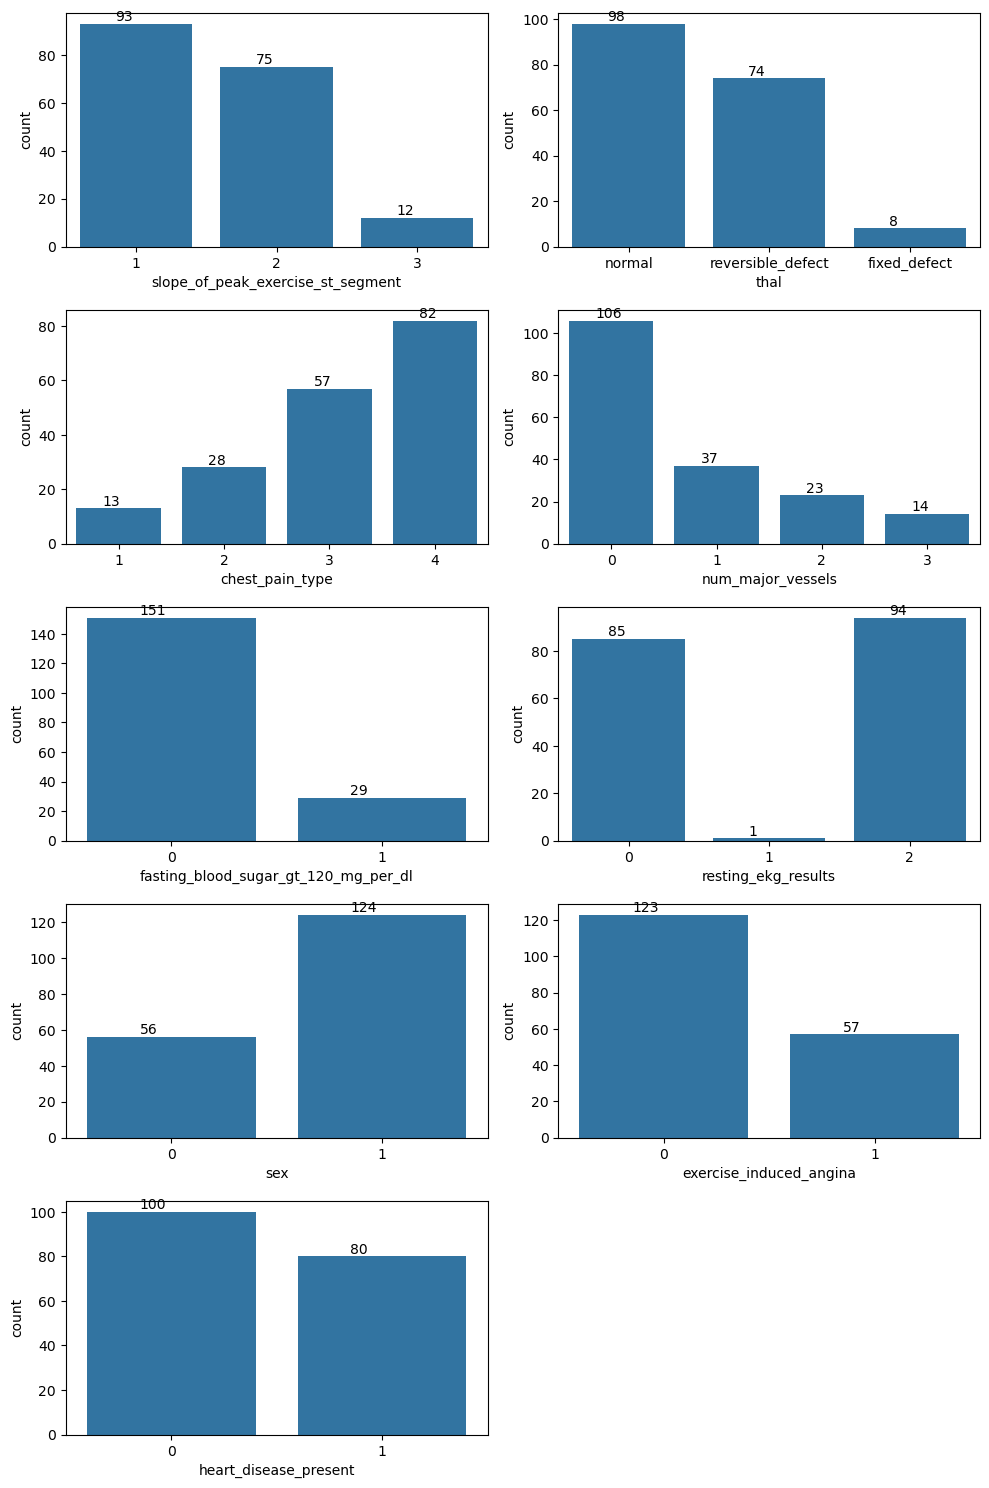

In [23]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in d1:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = d1[i])
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.25,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insights  

* **52%** of the patients had **one slope** of the peak exercise ST segment.  
* **54%** of the patients showed a **normal thal result**, while **4%** had a **fixed defect**.  
* Almost **48%** of the patients experienced **type 4 chest pain**.  
* **60%** of the patients had **zero vessels** colored by fluoroscopy.  
* More than **20%** of the patients had **fasting blood sugar > 120 mg/dl**.  
* **52%** of the patients showed **type 2 resting electrocardiographic results**.  
* **70%** of the patients were **male**.  
* **32%** of the patients had **exercise-induced chest pain**.  
* **44%** of the patients were found to have **no heart disease present**.  

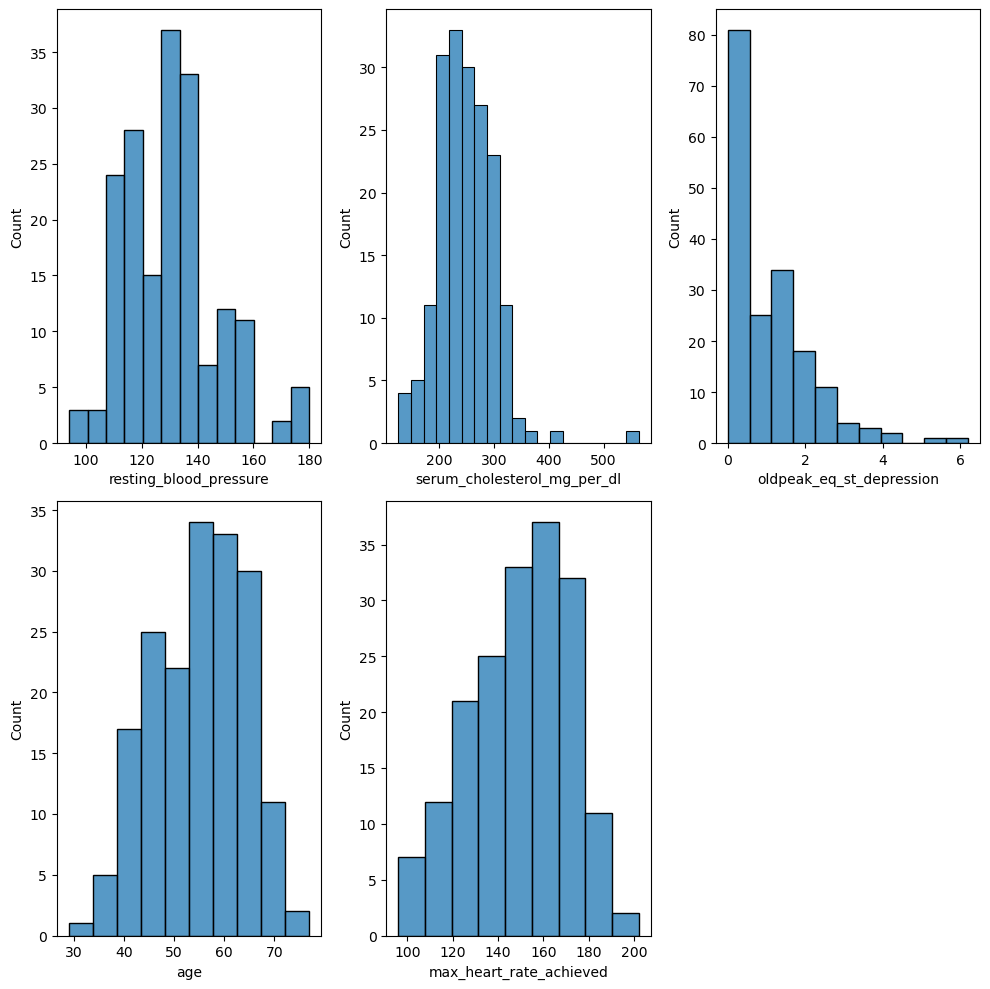

In [25]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

### Insights  

* More than **50%** of the patients have **resting blood pressure** in the range of **120–160 mmHg**.  
* More than **70%** of the patients have **serum cholesterol** in the range of **180–280 mg/dl**.  
* Most of the patients have **zero old peak ST depression** induced by exercise relative to rest.  
* The majority of patients fall in the **age group 40–65 years**.  
* The majority of patients achieved a **maximum heart rate** between **120–180 bpm**.  

### Bivariate Anaylsis

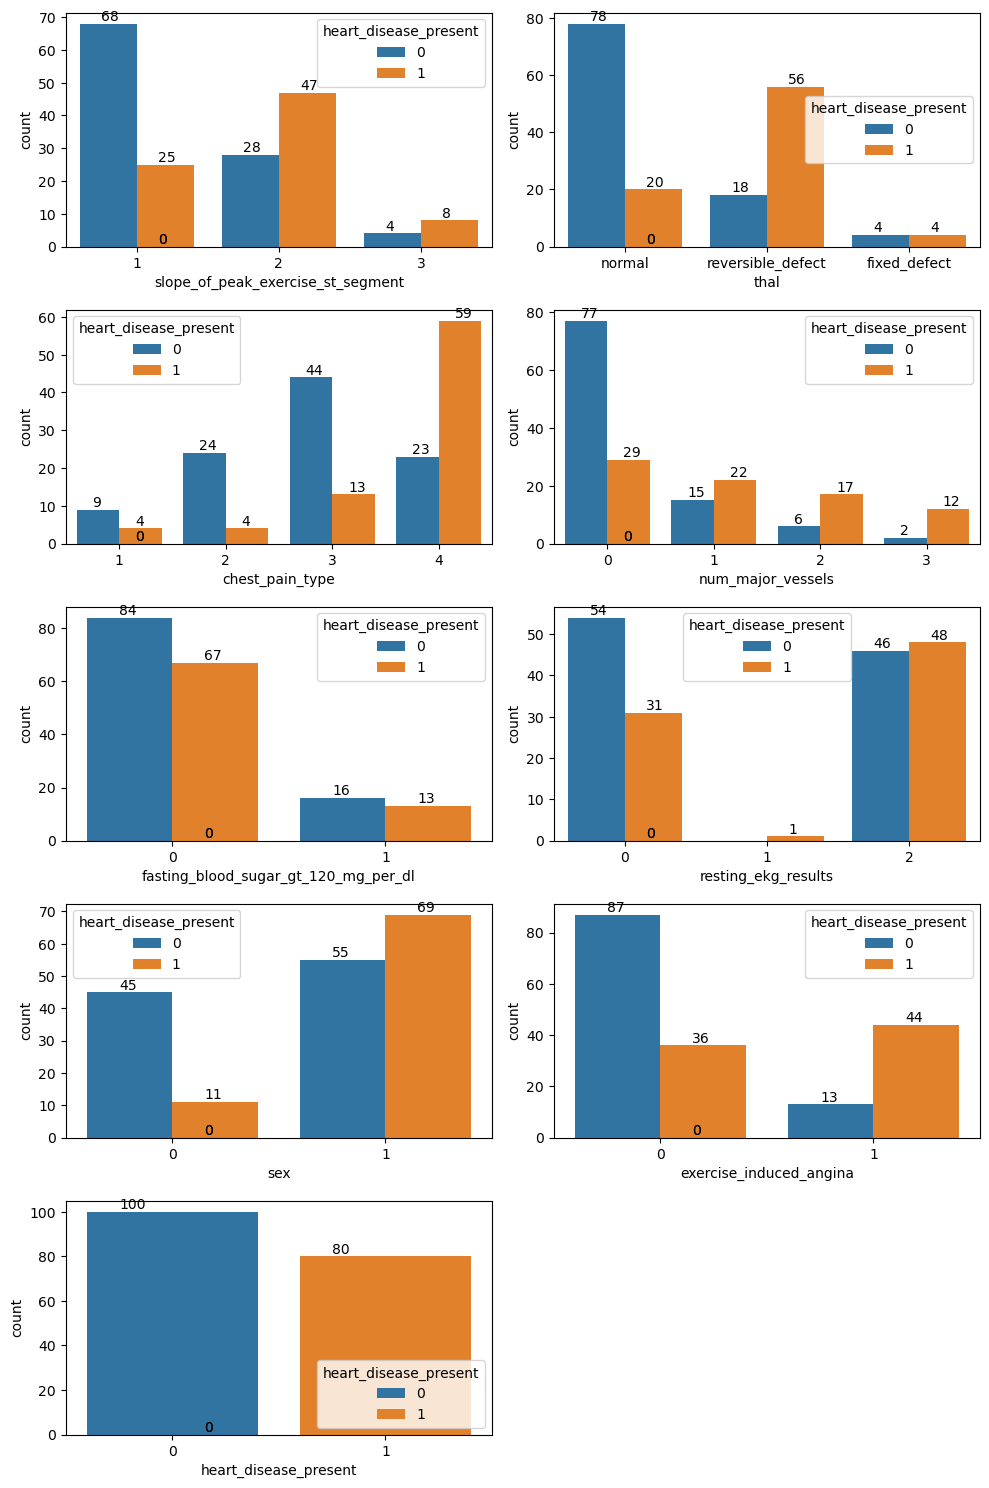

In [28]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in d1:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = d1[i],hue=hd.heart_disease_present)
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.15,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insights  

* Most patients with **slope = 2** (peak exercise ST segment) have **Heart Disease present**.  
* Most patients with **reversible defect (thal)** have **Heart Disease present**.  
* Almost **48%** of the patients have **type 4 chest pain**, and most of them have **Heart Disease present**.  
* Patients with **2 vessels colored by fluoroscopy** mostly have **Heart Disease present**.  
* Patients with **resting electrocardiographic result = 2** mostly have **Heart Disease present**.  
* About **70%** of the patients are **male**, and most of them have **Heart Disease present**.  
* Around **32%** of patients with **exercise-induced chest pain** have **Heart Disease present**.  
* About **44%** of the patients **do not have Heart Disease present**.  

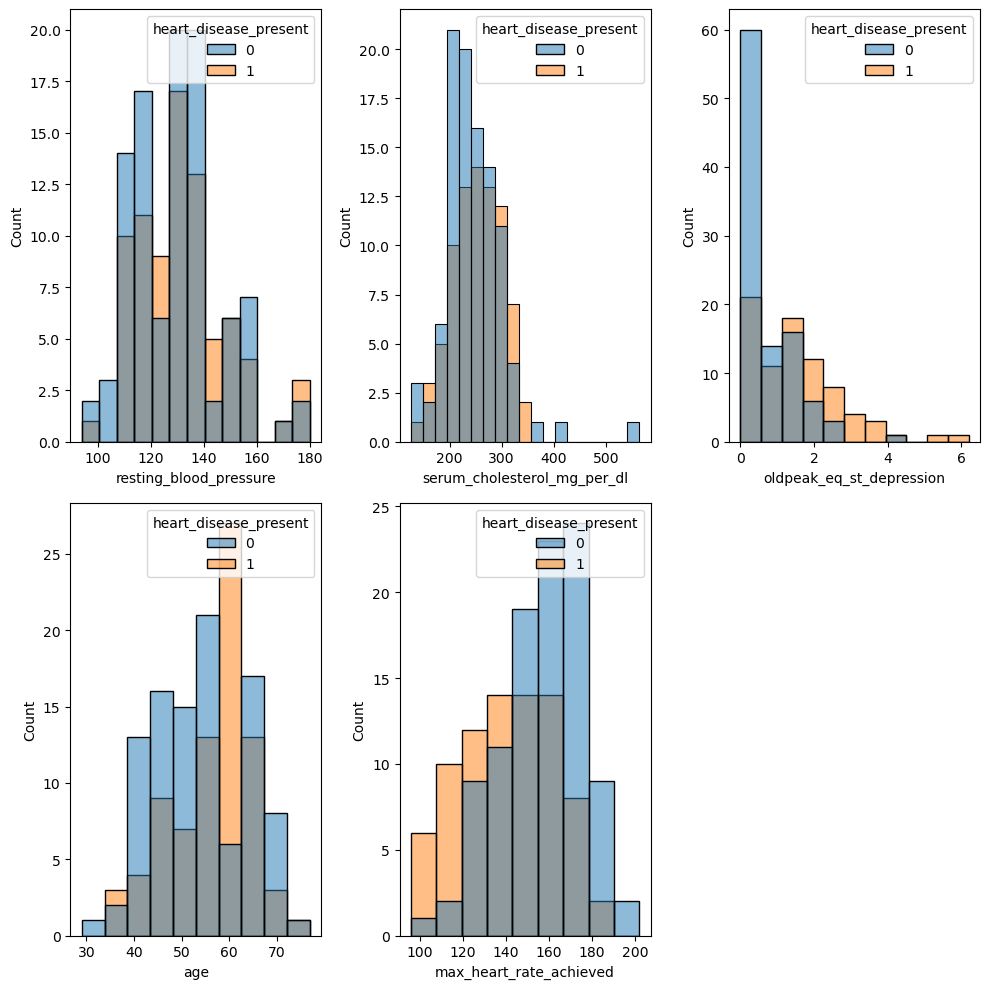

In [30]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x = d2[i],hue=hd.heart_disease_present)
    plotnumber+=1
plt.tight_layout()

### Insights  

* More than **50%** of the patients have **resting blood pressure between 120–160**, and most of them have **Heart Disease present**.  
* More than **70%** of the patients with **serum cholesterol (mg/dl)** fall in the critical range, and most of them have **Heart Disease present**.  
* Most of the patients with **old peak = 0 (ST depression induced by exercise relative to rest)** have **No Heart Disease present**.  
* The majority of patients with **maximum heart rate achieved between 100–160** have **Heart Disease present**.  

# Data Preprocessing

### Handling With Null Values

In [34]:
hd.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [35]:
hd.duplicated().sum()

0

### Handling With Outlayers

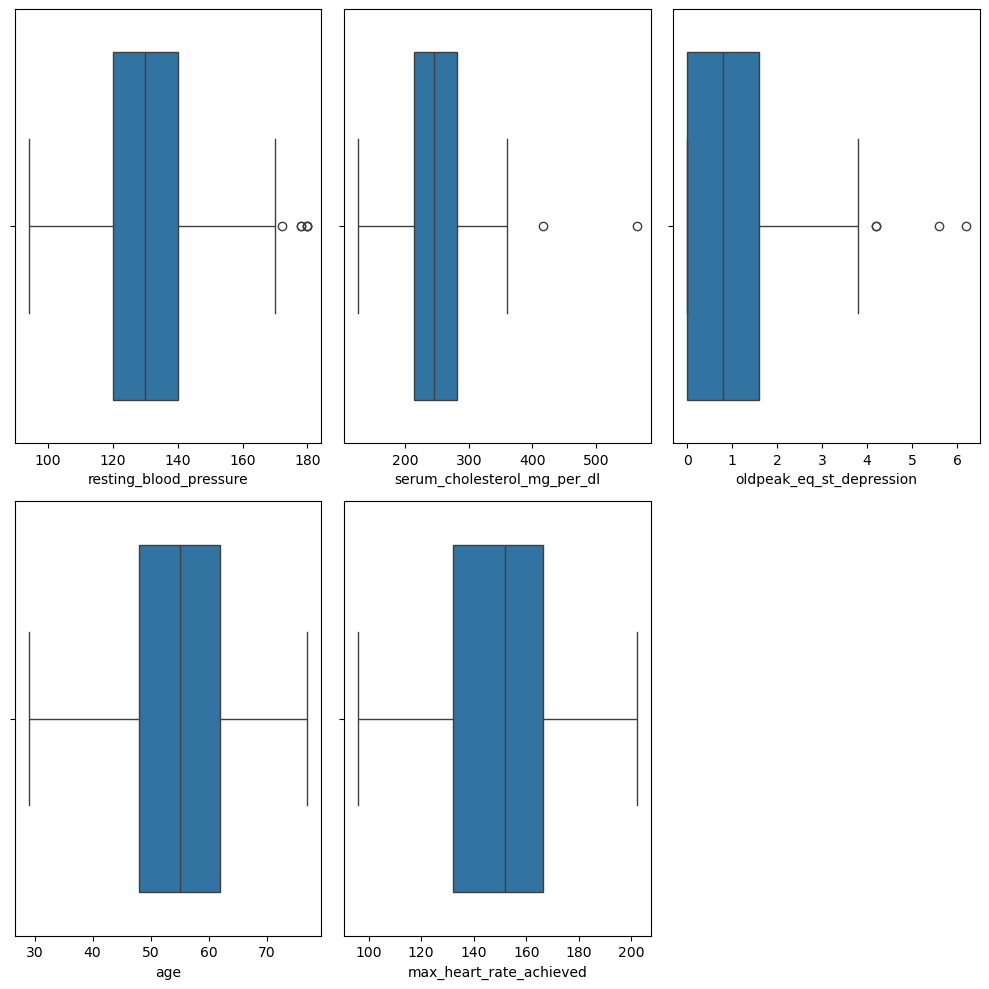

In [37]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.boxplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

#### resting_blood_pressure

In [39]:
min_rbp = np.mean(hd.resting_blood_pressure) - 2.7*np.std(hd.resting_blood_pressure)
min_rbp

85.51067006519976

In [40]:
max_rbp = np.mean(hd.resting_blood_pressure) + 2.7*np.std(hd.resting_blood_pressure)
max_rbp

177.11155215702246

In [41]:
hd.loc[(hd.resting_blood_pressure>max_rbp)|(hd.resting_blood_pressure<min_rbp),
         'resting_blood_pressure'] = np.median(hd.resting_blood_pressure)

<Axes: xlabel='resting_blood_pressure'>

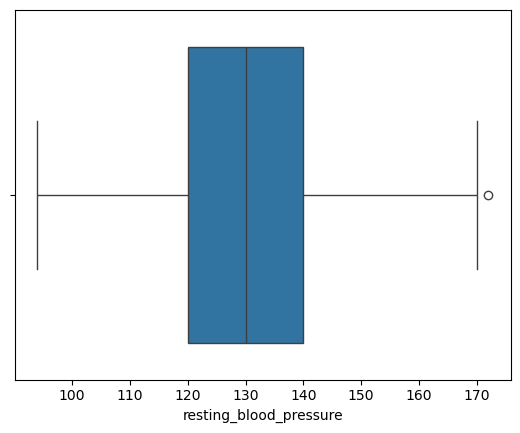

In [42]:
sns.boxplot(x = hd.resting_blood_pressure)

### Other Columns 

In [44]:
numerical_columns = ['serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression']

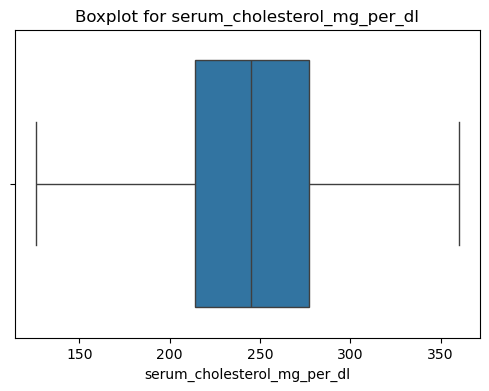

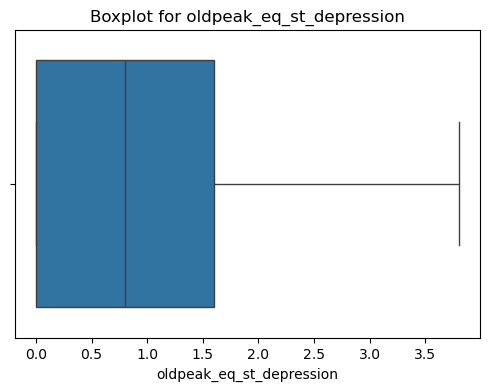

In [45]:
for col in numerical_columns:
    min_val = np.mean(hd[col]) - 2.7 * np.std(hd[col])
    max_val = np.mean(hd[col]) + 2.7 * np.std(hd[col])
    hd.loc[(hd[col] > max_val) | (hd[col] < min_val), col] = np.median(hd[col])
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=hd[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Convert Categerical data to Numerical data

In [47]:
hd.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [48]:
hd.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [49]:
hd.loc[hd.thal == 'normal','thal'] = 2
hd.loc[hd.thal == 'reversible_defect','thal'] = 1
hd.loc[hd.thal == 'fixed_defect','thal'] = 0

In [50]:
hd.thal.value_counts()

thal
2    98
1    74
0     8
Name: count, dtype: int64

In [51]:
hd['thal'] = hd.thal.astype(np.int64)

## Scaling

In [53]:
mn = MinMaxScaler()

In [54]:
hd

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,ryoo3j,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,yt1s1x,1,2,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,oyt4ek,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,1,125,4,2,1,0,254.0,0.2,1,67,163,0,1
176,2s2b1f,2,2,130,4,0,0,1,327.0,3.4,0,55,117,1,1
177,nsd00i,2,1,125,3,0,0,0,309.0,1.8,1,64,131,1,1
178,0xw93k,1,2,124,3,2,1,0,255.0,0.0,1,48,175,0,0


In [55]:
d2.columns


Index(['patient_id', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved'],
      dtype='object')

In [56]:
sc=['resting_blood_pressure', 'serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']

In [57]:
for i in sc:
    hd[i]=mn.fit_transform(hd[[i]])

In [58]:
hd

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,2,0.435897,2,0,0,2,0.777778,0.000000,1,0.333333,0.698113,0,0
1,ryoo3j,2,2,0.205128,3,0,0,0,0.376068,0.421053,0,0.520833,0.584906,0,0
2,yt1s1x,1,2,0.397436,4,3,0,2,0.760684,0.000000,1,1.000000,0.622642,1,1
3,l2xjde,1,1,0.743590,4,0,0,0,0.414530,0.000000,1,0.229167,0.801887,0,1
4,oyt4ek,3,1,0.461538,1,0,0,2,0.615385,0.210526,1,0.625000,0.462264,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,1,0.397436,4,2,1,0,0.547009,0.052632,1,0.791667,0.632075,0,1
176,2s2b1f,2,2,0.461538,4,0,0,1,0.858974,0.894737,0,0.541667,0.198113,1,1
177,nsd00i,2,1,0.397436,3,0,0,0,0.782051,0.473684,1,0.729167,0.330189,1,1
178,0xw93k,1,2,0.384615,3,2,1,0,0.551282,0.000000,1,0.395833,0.745283,0,0


## Feature Selection 

In [60]:
d2.drop('patient_id',axis=1).corr()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
resting_blood_pressure,1.000000,0.144881,0.219026,0.284402,-0.017521
serum_cholesterol_mg_per_dl,0.144881,1.000000,-0.021932,0.236211,-0.071038
oldpeak_eq_st_depression,0.219026,-0.021932,1.000000,0.189700,-0.341045
age,0.284402,0.236211,0.189700,1.000000,-0.394630
max_heart_rate_achieved,-0.017521,-0.071038,-0.341045,-0.394630,1.000000


<Axes: >

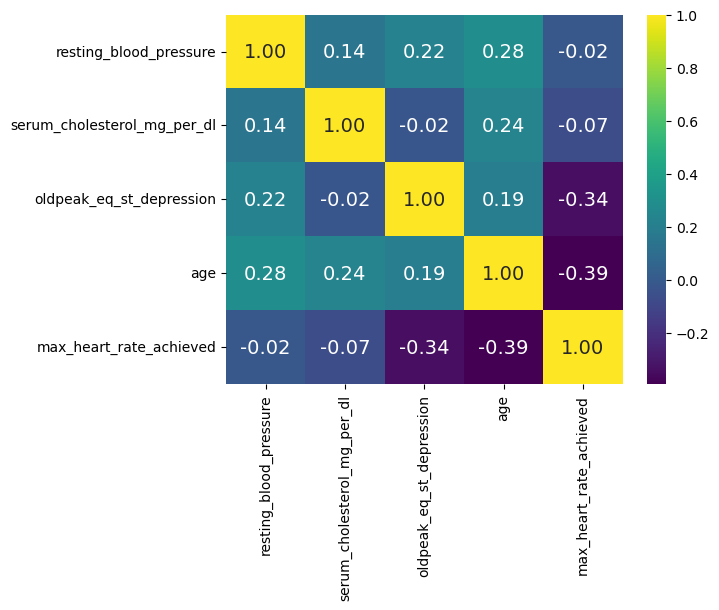

In [61]:
sns.heatmap(d2.drop('patient_id',axis=1).corr(),annot=True,annot_kws={"size":14},cmap="viridis",fmt='.2f')

# Model Creation

In [63]:
x = hd.drop(['patient_id','heart_disease_present'],axis=1)
y = hd.heart_disease_present

In [64]:
print(x.shape)
print(y.shape)

(180, 13)
(180,)


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [67]:
y_train.value_counts()

heart_disease_present
0    81
1    54
Name: count, dtype: int64

In [68]:
y_train.value_counts()

heart_disease_present
0    81
1    54
Name: count, dtype: int64

In [69]:
y_test.value_counts()

heart_disease_present
1    26
0    19
Name: count, dtype: int64

## Balancing 

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm = SMOTE()

In [73]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [74]:
y_sm.value_counts()

heart_disease_present
0    81
1    81
Name: count, dtype: int64

### Logistic Regression

In [78]:
lr = LogisticRegression()

In [79]:
lr.fit(x_sm,y_sm)

LogisticRegression()

In [80]:
y_predit_lr = lr.predict(x_test)
y_predit_lr

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [81]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_lr),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_lr))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



In [82]:
y_predit_lr_train = lr.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_lr_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_lr_train))

Train Score

accuracy_score 0.8592592592592593 

classification_report
               precision    recall  f1-score   support

           0       0.92      0.84      0.88        81
           1       0.79      0.89      0.83        54

    accuracy                           0.86       135
   macro avg       0.85      0.86      0.86       135
weighted avg       0.87      0.86      0.86       135



### SVM

In [84]:
svm = SVC()

In [85]:
svm.fit(x_sm,y_sm)

SVC()

In [86]:
y_predit_svm = svm.predict(x_test)
y_predit_svm

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [87]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_svm))

Test Score

accuracy_score 0.8888888888888888 

classification_report
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.81      0.89        26

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.91      0.89      0.89        45



In [88]:
y_predit_svm_train = svm.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_svm_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_svm_train))

Train Score

accuracy_score 0.8666666666666667 

classification_report
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        81
           1       0.80      0.89      0.84        54

    accuracy                           0.87       135
   macro avg       0.86      0.87      0.86       135
weighted avg       0.87      0.87      0.87       135



### KNN

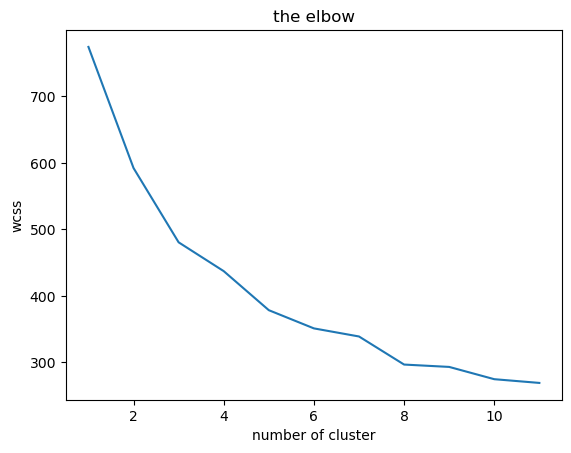

In [90]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,12):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title("the elbow")
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)

In [92]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [93]:
y_predit_knn = knn.predict(x_test)
y_predit_knn 

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [94]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_knn),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_knn))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



In [95]:
y_predit_knn_train = knn.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_knn_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_knn_train))

Train Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        81
           1       0.80      0.81      0.81        54

    accuracy                           0.84       135
   macro avg       0.84      0.84      0.84       135
weighted avg       0.84      0.84      0.84       135



## Decision Tree 

In [97]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_sm,y_sm)

DecisionTreeClassifier(random_state=42)

In [98]:
y_predit_dt = dt.predict(x_test)
y_predit_dt

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

In [99]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt))

Test Score

accuracy_score 0.7777777777777778 

classification_report
               precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.83      0.77      0.80        26

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



In [100]:
y_predit_dt_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_dt_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_dt_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Bagging using Decision Tree

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [103]:
model_bagg = BaggingClassifier(estimator=dt, n_estimators=30,random_state=15)
model_bagg.fit(x_sm,y_sm)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=30, random_state=15)

In [104]:
y_predit_bagg = model_bagg.predict(x_test)

In [105]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_bagg),'\n')
print('classification_report\n',classification_report(y_test,y_predit_bagg))

Test Score

accuracy_score 0.8 

classification_report
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.90      0.73      0.81        26

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



In [106]:
y_predit_bagg_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_bagg_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_bagg_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Random Forest 

In [108]:
rf = RandomForestClassifier(n_estimators=200,random_state=52)
rf.fit(x_sm,y_sm)

RandomForestClassifier(n_estimators=200, random_state=52)

In [109]:
y_predit_rf = rf.predict(x_test)
y_predit_rf

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [110]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf))

Test Score

accuracy_score 0.8666666666666667 

classification_report
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.77      0.87        26

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.90      0.87      0.87        45



In [111]:
y_predit_rf_train = rf.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_rf_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_rf_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Hyperparameter Tuning using Random Forest

In [113]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [114]:
grid_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy',random_state=23)

In [115]:
grid_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=200,
                                                    random_state=52),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=23, scoring='accuracy')

In [116]:
grid_search.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [117]:
rf_hyp = RandomForestClassifier(n_estimators= 1200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= False)

In [118]:
rf_hyp.fit(x_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=1200)

In [119]:
y_predit_rf_hyp = rf_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf_hyp))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.77      0.85        26

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



In [120]:
rf_hyp_train = rf_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,rf_hyp_train),'\n')
print('classification_report\n',classification_report(y_train,rf_hyp_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Gradient Boosting

In [122]:
gb = GradientBoostingClassifier()

In [123]:
gb.fit(x_sm,y_sm)

GradientBoostingClassifier()

In [124]:
y_predit_gb = gb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_gb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_gb))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



In [125]:
y_predit_gb_train = gb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_gb_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_gb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## XGBoost

In [127]:
xgb = XGBClassifier()

In [128]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
y_predit_xgb = xgb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.8 

classification_report
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        19
           1       0.95      0.69      0.80        26

    accuracy                           0.80        45
   macro avg       0.82      0.82      0.80        45
weighted avg       0.84      0.80      0.80        45



In [130]:
xgb_train = xgb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Hyperparameter Tuning XGBoost

In [132]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [133]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [134]:
random_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [135]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [136]:
xgb_hyp = XGBClassifier(subsample = 1.0,
  n_estimators = 200,
  min_child_weight = 5,
  max_depth = 4,
  learning_rate = 0.2,
  gamma = 0,
  colsample_bytree = 0.9)

In [137]:
xgb_hyp.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [138]:
y_predit_xgb_hyp = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        19
           1       0.95      0.69      0.80        26

    accuracy                           0.80        45
   macro avg       0.82      0.82      0.80        45
weighted avg       0.84      0.80      0.80        45



In [139]:
xgb_train = xgb_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 0.9555555555555556 

classification_report
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        81
           1       0.93      0.96      0.95        54

    accuracy                           0.96       135
   macro avg       0.95      0.96      0.95       135
weighted avg       0.96      0.96      0.96       135



# Conclusions

In [141]:
models=['LogisticRegression','KNN','SVM','Decision Tree','Random Forest','Bagging','xgboost']
accuracy_scores=[ accuracy_score(y_test,y_predit_lr),accuracy_score(y_test,y_predit_knn),accuracy_score(y_test,y_predit_svm),accuracy_score(y_test,y_predit_dt),accuracy_score(y_test,y_predit_rf_hyp),accuracy_score(y_test,y_predit_bagg),accuracy_score(y_test,y_predit_xgb_hyp)]

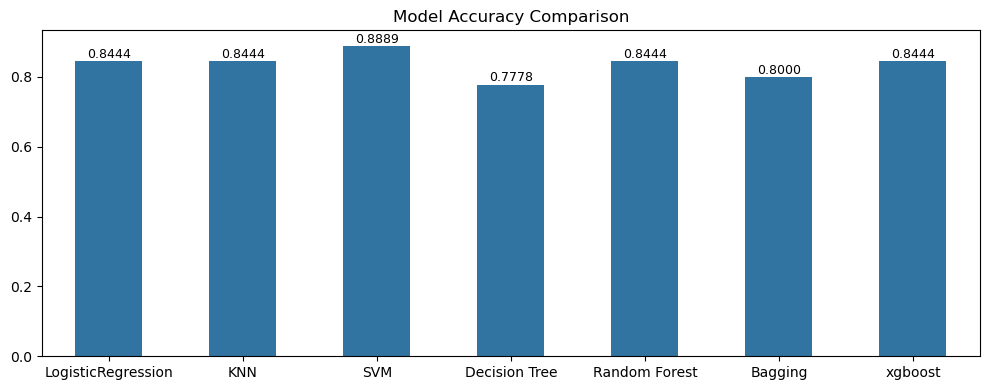

In [142]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5)
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Model Comparison Report
Using Random SVM, we achieved a comparable accuracy score of over 88%, demonstrating our ability to predict values that closely align with actual prices for most rows.
Therefore, we can select SVM, making it the ideal choice for production. By integrating this model into the hospital’s systems, healthcare providers can effectively predict heart disease and provide timely care to patients.

## Report on Challenges faced

#### 1. Imbalanced Data
##### Problem:
The dataset had more patients without heart disease compared to those with heart disease, which could make the model biased.
##### Solution:
We used SMOTE to add more examples of patients with heart disease. This method creates new data points for the smaller group.
##### Why:
Balancing the data helps the model learn equally about both groups, improving its ability to predict heart disease.

#### 2. Outliers
##### Problem:
Extreme values in features like blood pressure and cholesterol could affect the model’s accuracy.
##### Solution:
We used the IQR method to identify and limit extreme values to a reasonable range.
##### Why:
Handling outliers ensures the model isn’t influenced by unusual data.

#### 3. Different Feature Scales
##### Problem:
Features like age and cholesterol have different scales, which can cause the model to give more importance to features with larger values.
##### Solution:
Use MinMaxScaler to scale all features between 0 and 1 for uniformity.
##### Why:
Scaling ensures all features contribute equally to the model, improving accuracy and model performance.

#### 4. Categorical Data Issues
##### Problem:
Categorical values in the 'thal' column, like 'normal', 'reversible_defect', and 'fixed_defect', need to be converted into numerical values for the model to understand.
##### Solution:
Convert categorical values in the 'thal' column to numerical values (2, 1, and 0) using the loc method.
##### Why:
Machine learning models can only work with numerical data, so encoding categorical values ensures the model can process the information correctly.